In [1]:
#importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Sequential, models
from tensorflow.keras.layers.experimental.preprocessing import Resizing, Rescaling
import numpy as np
import cv2

In [51]:
#initilize global variables
IMAGE_SIZE = 256
CHANNELS = 3
BATCH_SIZE = 32
EPOCHS =50

In [5]:
#import the data using tensorflow keras and image size is of 256 and we creating a batch of 32 
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [6]:
#checking classes
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

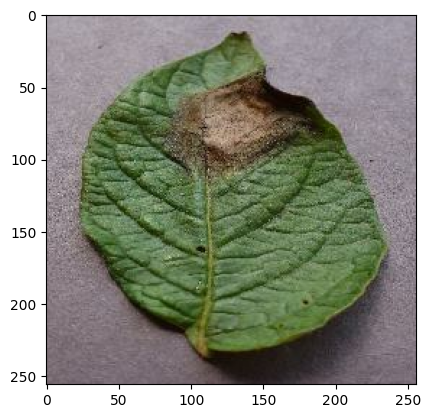

In [7]:
#displaying sample image from our dataset
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

In [8]:
training_data = dataset.take(54)
testing_data = dataset.skip(54)
validation_data = testing_data.take(6)
testing_data = testing_data.skip(6)

In [9]:
def get_dataset_partitions_tf(ds,train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size  = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [10]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [11]:
#read the image from the disk
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
#Resizing the image
resize_and_rescale =  tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [39]:
#performing data augmentation for make our imgae robust
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomContrast(0.2),
])

In [40]:
#Creating a method name GammaCorrection, We adjust the brightmness level of image by 1.00
class GammaCorrection(layers.Layer):
    def __init__(self, gamma=1.0):
        super(GammaCorrection, self).__init__()
        self.gamma = gamma

    def call(self, inputs):
        # Apply gamma correction to the inputs
        return tf.pow(inputs, self.gamma)

In [94]:
#perform gamma correction and batch normalization remove last layer
#model training
#input_shape  = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
#n_classes = 3
#model = models.Sequential([
#    resize_and_rescale,
#    data_augmentation,
#    layers.Conv2D(32, (3,3), activation="relu", input_shape = input_shape),
#    layers.MaxPooling2D((2,2)),
 #   layers.BatchNormalization(),
#    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
 #   layers.MaxPooling2D((2,2)),
  #  layers.BatchNormalization(),
  #  layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
#    layers.MaxPooling2D((2,2)),
#    layers.BatchNormalization(),
#    layers.Conv2D(32, (3,3), activation="relu"),
#    layers.MaxPooling2D((2,2)),
#    layers.BatchNormalization(),
#    layers.Conv2D(32, (3,3), activation="relu"),
#    layers.MaxPooling2D((2,2)),
#    layers.BatchNormalization(),
#    layers.Conv2D(32, (3,3), activation="relu"),
#    layers.MaxPooling2D((2,2)),
#    layers.Flatten(),
#    layers.Dense(64,activation="relu"),
#    GammaCorrection(gamma=1.5),
#    layers.Dense(n_classes,activation="softmax")
#])

#model.build(input_shape = input_shape)

In [93]:
#perform gamma correction and batch normalization removed last layer
#model.compile(
#    optimizer='adam',
#    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#    metrics=['accuracy']
#)

In [92]:
#perform gamma correction and batch normalization remove last layer
#history = model.fit(
#    train_ds,
#    epochs=EPOCHS,
#    batch_size=BATCH_SIZE,
#    verbose=1,
#    validation_data=val_ds
#)

In [90]:
#when using batch normalization with gamma correction remove last layer
#score = model.evaluate(test_ds)

In [91]:
#when using batch normalization with gamma correction remove last layer
#score    #82#when last layer removed 89

In [48]:
#model training using gamma correction
#input_shape  = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
#n_classes = 3
#model = models.Sequential([
#    resize_and_rescale,
#    data_augmentation,
#    layers.Conv2D(32, (3,3), activation="relu", input_shape = input_shape),
#    layers.MaxPooling2D((2,2)),
#    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
#    layers.MaxPooling2D((2,2)),
#    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
#    layers.MaxPooling2D((2,2)),
#    layers.Conv2D(32, (3,3), activation="relu"),
#    layers.MaxPooling2D((2,2)),
#    layers.Conv2D(32, (3,3), activation="relu"),
#    layers.MaxPooling2D((2,2)),
#    layers.Conv2D(32, (3,3), activation="relu"),
#    layers.MaxPooling2D((2,2)),
#    layers.Flatten(),
#    layers.Dense(64,activation="relu"),
#    GammaCorrection(gamma=1.5),
#    layers.Dense(n_classes,activation="softmax")
#])

#model.build(input_shape = input_shape)

In [130]:
#model.summary()

In [50]:
#model optimization using adam
#model.compile(
#    optimizer='adam',
#    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#    metrics=['accuracy']
#)

In [131]:
#train the actual model and fit the data into the model
#history = model.fit(
#    train_ds,
#    epochs=EPOCHS,
#    batch_size=BATCH_SIZE,
#    verbose=1,
#    validation_data=val_ds
#)

In [132]:
#testing our model using testing data when gamma is used
#score = model.evaluate(test_ds)

In [133]:
#loss and accuray of testing data when gamma is used
#score      #94%

In [52]:
#model training using gamma correction when reduce layers 
#############################################################
input_shape  = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation="relu", input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    GammaCorrection(gamma=1.5),
    layers.Dense(n_classes,activation="softmax")
])

model.build(input_shape = input_shape)

In [53]:
#model optimization using adam
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [54]:
#train the actual model and fit the data into the model
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 72s 1s/step - loss: 0.9092 - accuracy: 0.4838 - val_loss: 0.8578 - val_accuracy: 0.4271
Epoch 2/50
54/54 [==============================] - 66s 1s/step - loss: 0.6338 - accuracy: 0.7309 - val_loss: 0.5392 - val_accuracy: 0.7292
Epoch 3/50
54/54 [==============================] - 66s 1s/step - loss: 0.4174 - accuracy: 0.8310 - val_loss: 0.3646 - val_accuracy: 0.8698
Epoch 4/50
54/54 [==============================] - 61s 1s/step - loss: 0.2913 - accuracy: 0.8877 - val_loss: 0.2907 - val_accuracy: 0.9115
Epoch 5/50
54/54 [==============================] - 61s 1s/step - loss: 0.2353 - accuracy: 0.9109 - val_loss: 0.2593 - val_accuracy: 0.8906
Epoch 6/50
54/54 [==============================] - 60s 1s/step - loss: 0.2276 - accuracy: 0.9080 - val_loss: 0.3103 - val_accuracy: 0.9115
Epoch 7/50
54/54 [==============================] - 60s 1s/step - loss: 0.1926 - accuracy: 0.9282 - val_loss: 0.2545 - val_accuracy: 0.9010
Epoch 8/50
54/54 [==

In [55]:
#removing CNN layers with gamma 5 epoch add contrast
score = model.evaluate(test_ds)

8/8 [==============================] - 2s 220ms/step - loss: 0.1163 - accuracy: 0.9648


In [56]:
score
#while removing last 32 filter layer accuracy will be: 99.21%


[0.11630730330944061, 0.96484375]

In [57]:
#model training without gc
input_shape  = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model1 = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (13,3), activation="relu", input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes,activation="softmax")
])

model1.build(input_shape = input_shape)

In [58]:
#model optimization using adam withour gc
model1.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model1.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 61s 1s/step - loss: 0.8228 - accuracy: 0.5984 - val_loss: 0.6713 - val_accuracy: 0.7240
Epoch 2/50
54/54 [==============================] - 59s 1s/step - loss: 0.5070 - accuracy: 0.7894 - val_loss: 0.4152 - val_accuracy: 0.8438
Epoch 3/50
54/54 [==============================] - 60s 1s/step - loss: 0.3474 - accuracy: 0.8663 - val_loss: 0.4060 - val_accuracy: 0.8281
Epoch 4/50
54/54 [==============================] - 59s 1s/step - loss: 0.2914 - accuracy: 0.8808 - val_loss: 0.2565 - val_accuracy: 0.9010
Epoch 5/50
54/54 [==============================] - 59s 1s/step - loss: 0.2452 - accuracy: 0.9039 - val_loss: 0.4817 - val_accuracy: 0.8021
Epoch 6/50
54/54 [==============================] - 59s 1s/step - loss: 0.2580 - accuracy: 0.8843 - val_loss: 0.2281 - val_accuracy: 0.9115
Epoch 7/50
54/54 [==============================] - 60s 1s/step - loss: 0.2101 - accuracy: 0.9225 - val_loss: 0.1882 - val_accuracy: 0.9323
Epoch 8/50
 7/54 [==

In [ ]:
#when gamma is not used 10 epochs add contrast
score2 = model1.evaluate(test_ds)

In [ ]:
#when gamma correction is not used
score2     #89.8

In [97]:
##histogram equalization is used


In [134]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [135]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [136]:
len(history.history["accuracy"])

20

In [137]:
#ploting graph
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss  = history.history['val_loss']

Text(0.5, 1.0, 'Training and validation accuracy')

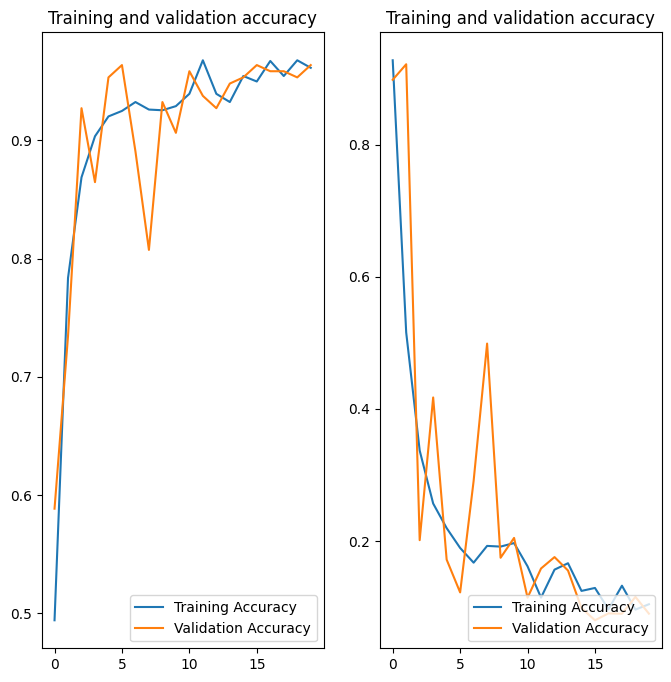

In [138]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc , label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss , label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_loss, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

first image to predict
my first label:  Potato___Late_blight
1/1 [==============================] - 0s 359ms/step
predicted label: Potato___Late_blight


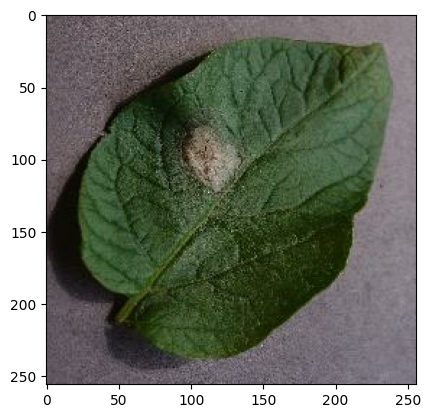

In [139]:
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print('first image to predict')
    plt.imshow(first_image)
    print("my first label: ",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [140]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)#create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 33ms/step


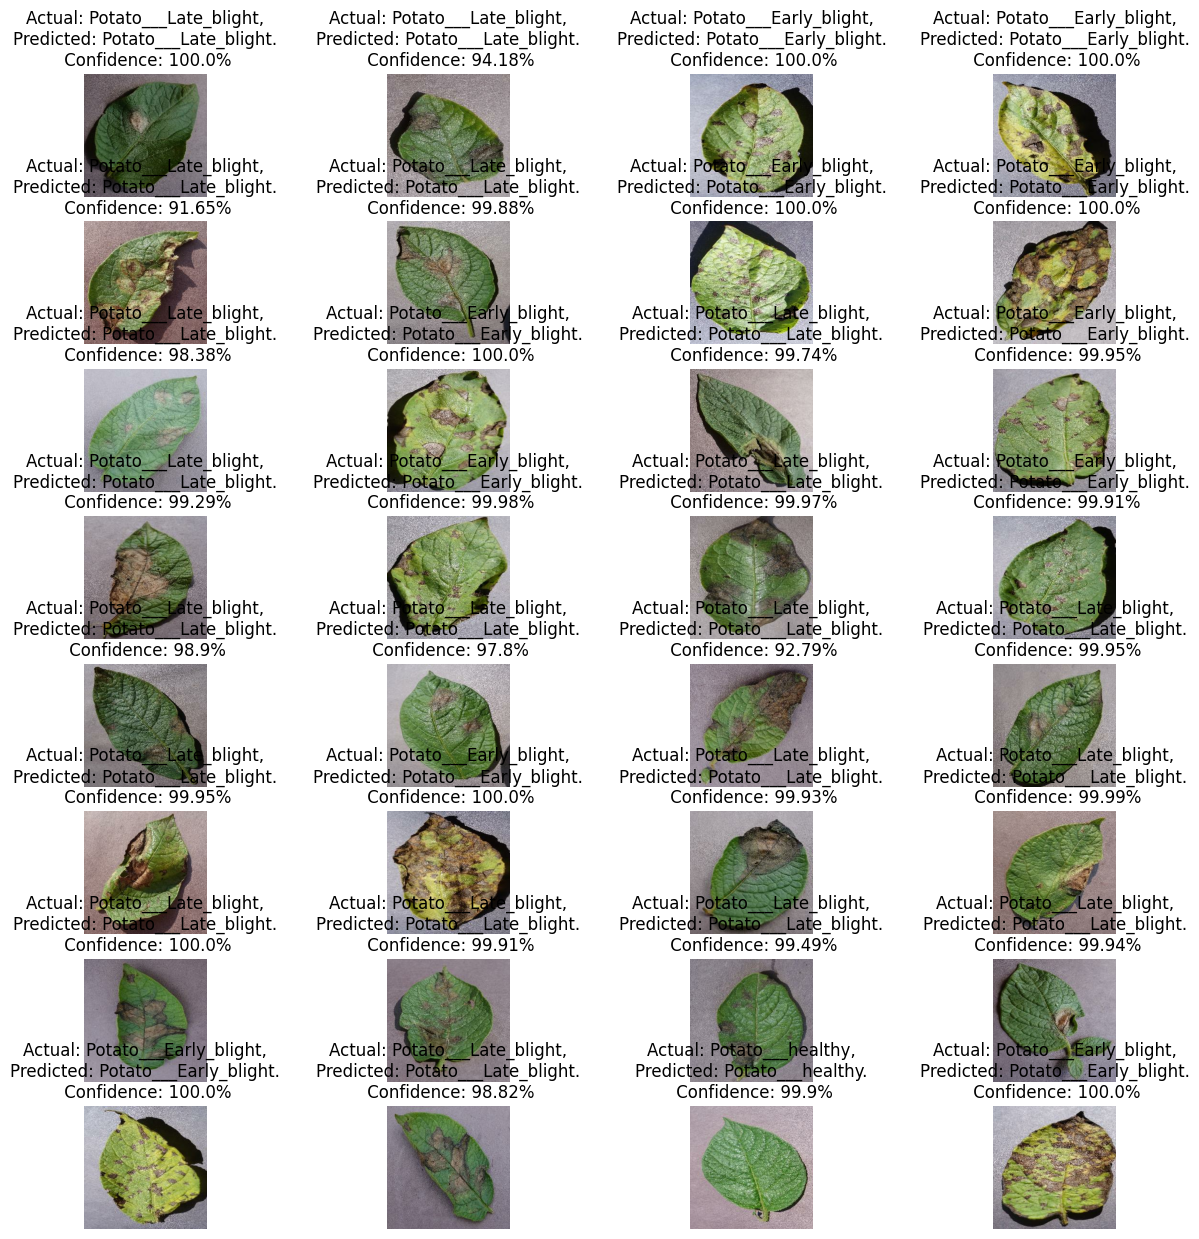

In [141]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(32):
        ax = plt.subplot(8,4,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis('off')

In [ ]:
##here we implement VGG16 using keras

In [20]:
from keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
input_size = [256,256,3]

In [21]:
vgg = VGG16(input_shape=input_size,weights='imagenet',include_top=False)
vgg.output

<KerasTensor: shape=(None, 8, 8, 512) dtype=float32 (created by layer 'block5_pool')>

In [22]:
for layer in vgg.layers:
    layer.trainable = False

In [27]:
train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(y, depth=3)))
val_ds = val_ds.map(lambda x, y: (x, tf.one_hot(y, depth=3)))
test_ds = test_ds.map(lambda x, y: (x, tf.one_hot(y, depth=3)))

In [24]:
x = Flatten()(vgg.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)  # NUM_CLASSES is the number of output classes

# Create a new model
model = Model(inputs=vgg.input, outputs=predictions)

# Compile the model model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc}")

Epoch 1/10
54/54 [==============================] - 386s 7s/step - loss: 4.4582 - accuracy: 0.8351 - val_loss: 0.2284 - val_accuracy: 0.9792
Epoch 2/10
54/54 [==============================] - 400s 7s/step - loss: 0.4641 - accuracy: 0.9589 - val_loss: 0.1594 - val_accuracy: 0.9792
Epoch 3/10
39/54 [====================>.........] - ETA: 2:26 - loss: 0.1858 - accuracy: 0.9768

KeyboardInterrupt: 

In [28]:
##train restnet

In [29]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


In [30]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


94765736/94765736 [==============================] - 382s 4us/step


In [31]:
for layer in base_model.layers:
    layer.trainable = False


In [33]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)  # NUM_CLASSES is the number of classes in your dataset

model = Model(inputs=base_model.input, outputs=predictions)


In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)


Epoch 1/10
54/54 [==============================] - 115s 2s/step - loss: 1.0384 - accuracy: 0.5394 - val_loss: 9.0976 - val_accuracy: 0.4740
Epoch 2/10
54/54 [==============================] - ETA: 0s - loss: 0.7010 - accuracy: 0.7147